In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'netflix_titles.csv'
netflix_df = pd.read_csv(file_path)

In [8]:
# Let's clean the data a bit for the plot.
# We'll count the number of titles for each year and type.
content_by_year = netflix_df.groupby(['release_year', 'type'])\
                            .size().unstack(fill_value=0)


In [9]:
# Filter out years before 2000 for a clearer view of the streaming boom.
content_by_year = content_by_year.loc[2000:]


<Figure size 1400x800 with 0 Axes>

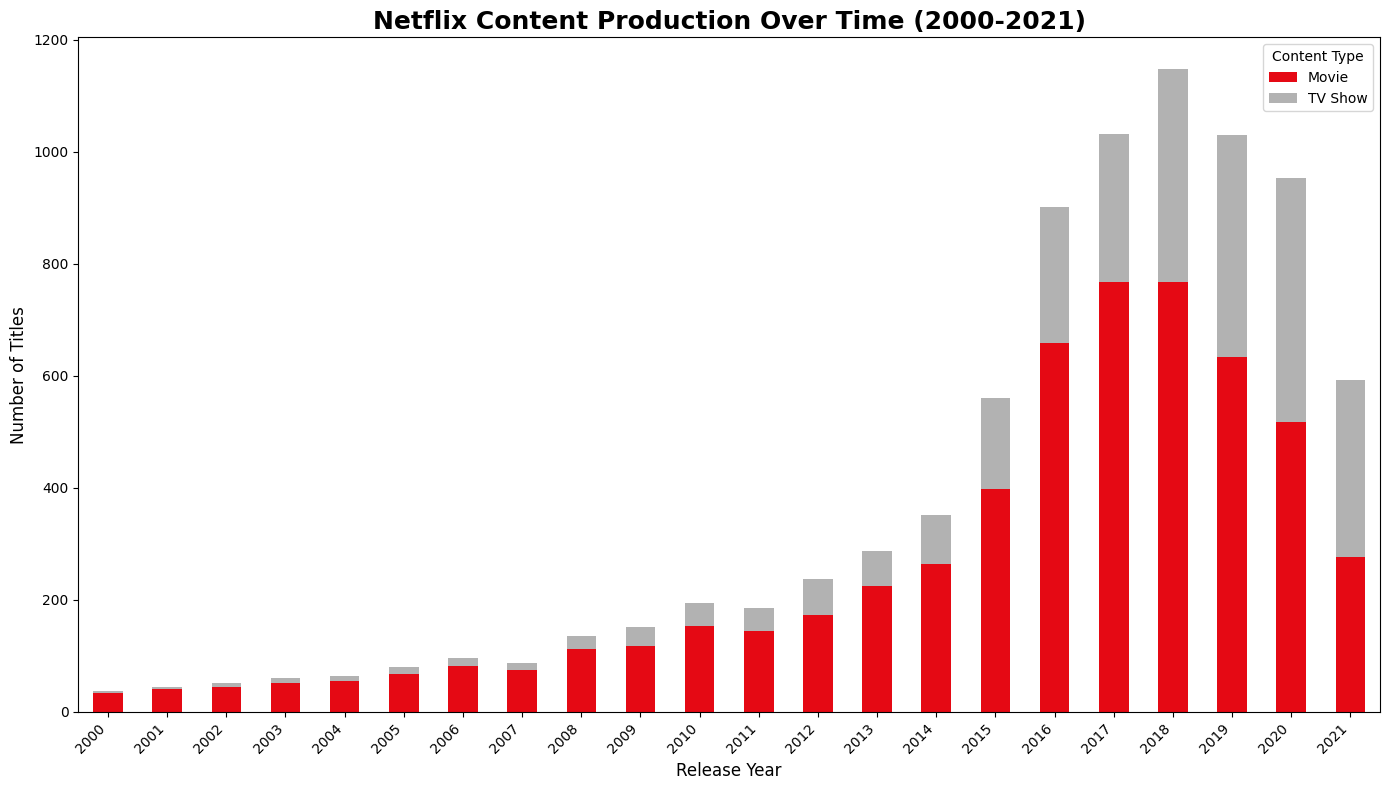

In [ ]:
# Set up the plot

plt.figure(figsize=(14, 8))
content_by_year.plot(kind='bar', stacked=True, figsize=(14, 8), 
                     color=['#e50914', '#b2b2b2'])
plt.title('Netflix Content Production Over Time (2000-2021)', 
          fontsize=18, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend(title='Content Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# We'll split the 'country' column and count each one.
# We'll drop rows with missing country information first.

countries_df = netflix_df.dropna(subset=['country']).copy()
all_countries = countries_df['country']\
                .str.split(',\s*', expand=True).stack()
country_counts = all_countries.value_counts()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27876\585226077.py:4: SyntaxWarning: invalid escape sequence '\s'
  all_countries = countries_df['country'].str.split(',\s*', expand=True).stack()


In [13]:
# Let's visualize the top 10 countries

top_10_countries = country_counts.head(10)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27876\1990853808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='plasma')


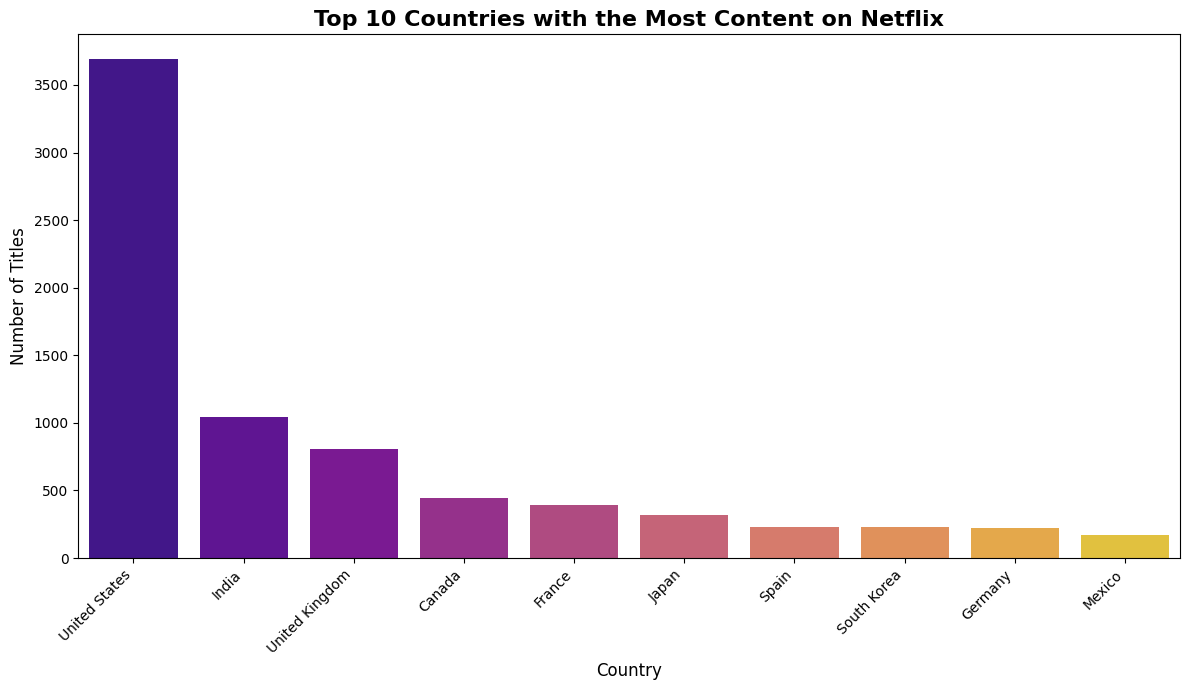

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values,
            palette='plasma')
plt.title('Top 10 Countries with the Most Content on Netflix', 
          fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()